In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Veri yükle
df = pd.read_csv("Sunspots_new.csv")  # Dosya adını kendi yoluna göre güncelle

# Hedef değişken ve özellikler
y = df['Monthly Mean Total Sunspot Number']
X = df.drop(columns=['Monthly Mean Total Sunspot Number'])

# Eğitim, doğrulama, test verisi ayırma (80/20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, shuffle=False)  # %60 train, %20 val, %20 test

# Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


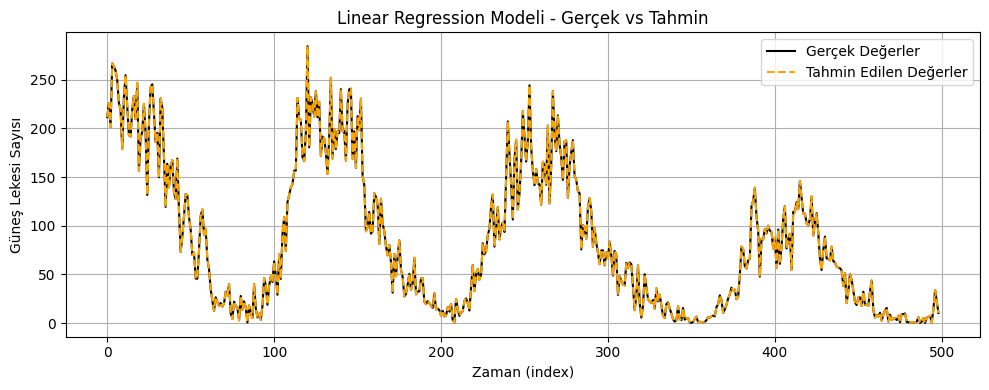

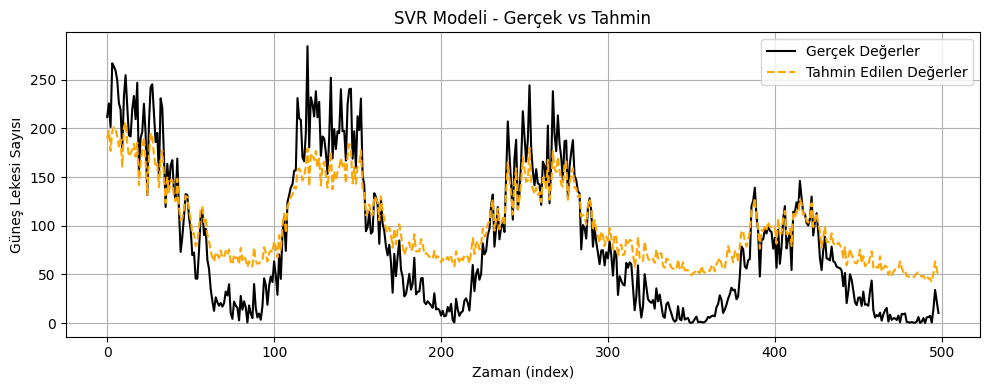

c:\Users\Monster\Desktop\Python\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


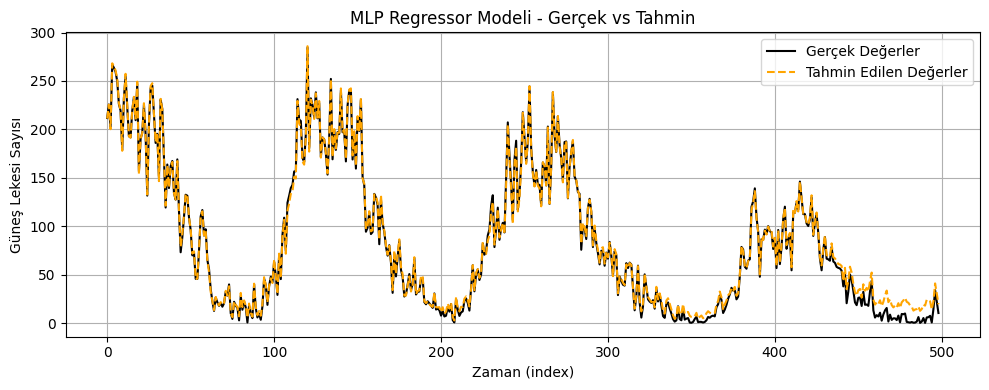

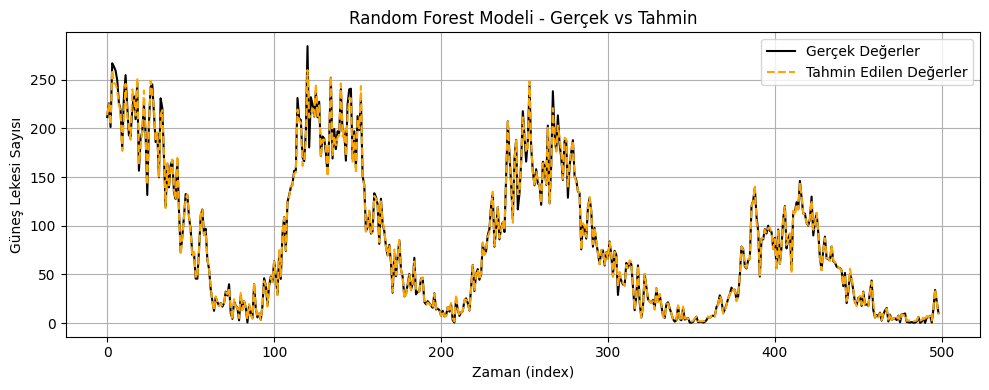

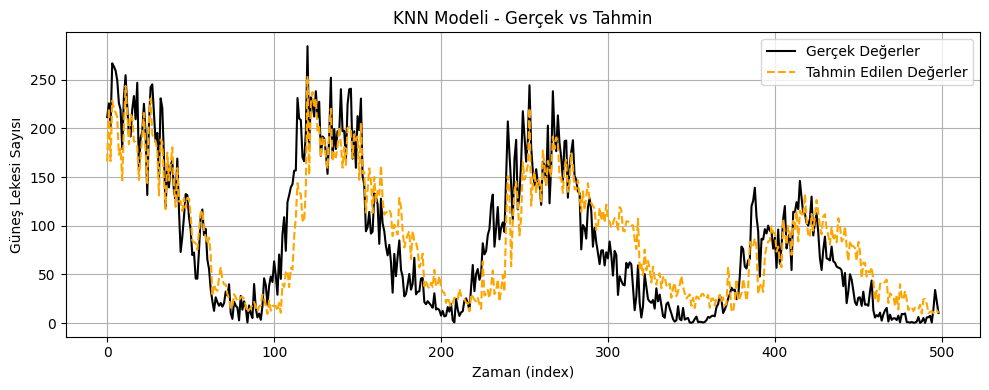

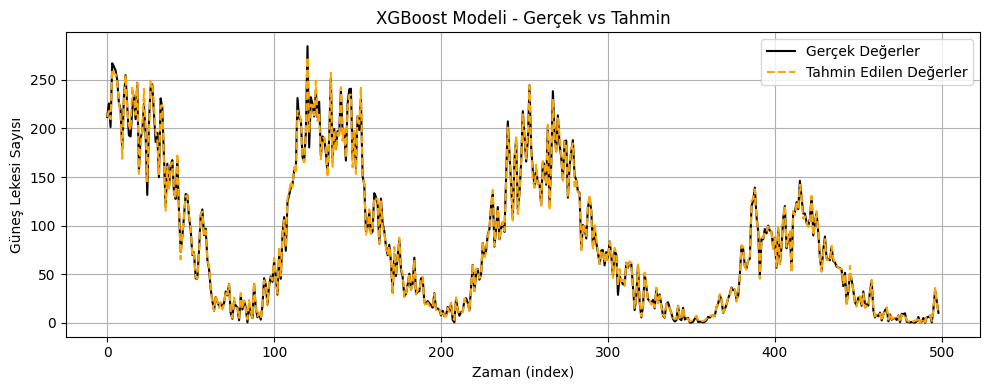

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Model tanımları
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(C=10, epsilon=0.1, kernel='rbf'),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, objective='reg:squarederror'),
}

# Değerlendirme ve grafik fonksiyonu
def evaluate_and_plot_model(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 4))
    plt.plot(y_test.values, label='Gerçek Değerler', color='black')
    plt.plot(y_pred, label='Tahmin Edilen Değerler', linestyle='--', color='orange')
    plt.title(f"{name} Modeli - Gerçek vs Tahmin")
    plt.xlabel("Zaman (index)")
    plt.ylabel("Güneş Lekesi Sayısı")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Her bir model için ayrı ayrı grafik çiz
for name, model in models.items():
    evaluate_and_plot_model(model, name, X_train_scaled, y_train, X_test_scaled, y_test)


In [5]:
def evaluate_and_plot_model(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Son %20'lik kısmı ayır (tahminler için)
    n = len(y_test)
    last_20_index = int(n * 0.2)

    y_test_last = y_test[-last_20_index:]
    y_pred_last = y_pred[-last_20_index:]

    # Grafik çizimi
    plt.figure(figsize=(10, 4))
    plt.plot(y_test_last.values, label='Gerçek Değerler', color='black')
    plt.plot(y_pred_last, label='Tahmin Değerleri', linestyle='--', color='orange')
    plt.title(f"{name} Modeli - Gerçek vs Tahmin (Test Verisinin Son %20’si)")
    plt.xlabel("Zaman (index)")
    plt.ylabel("Güneş Lekesi Sayısı")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


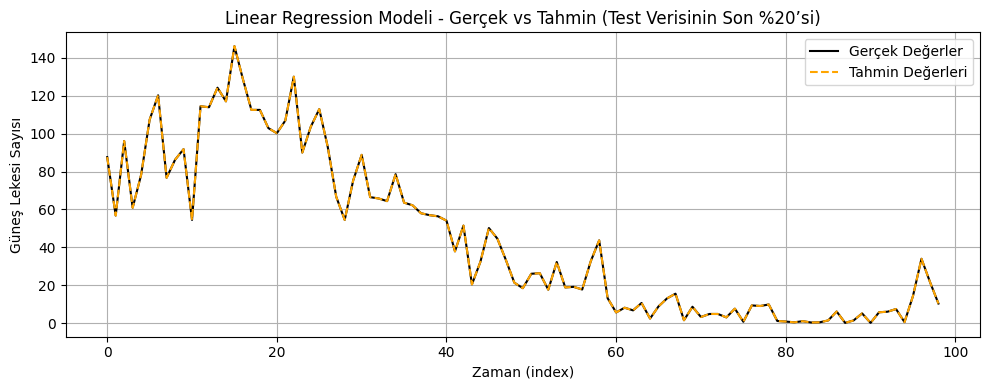

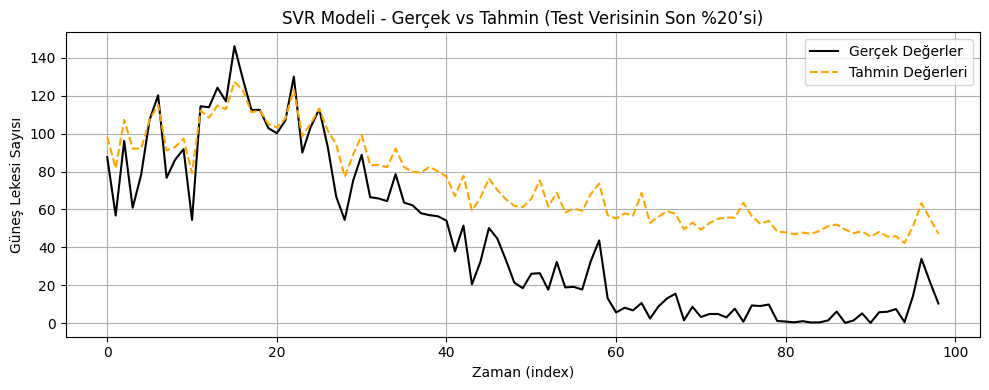

c:\Users\Monster\Desktop\Python\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


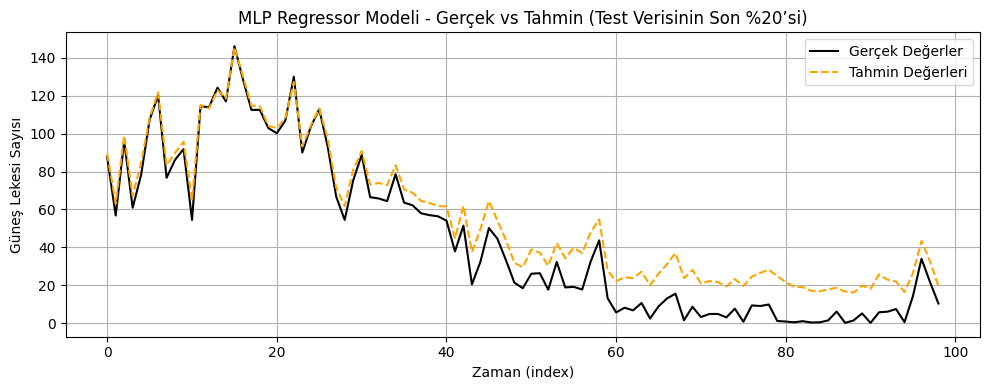

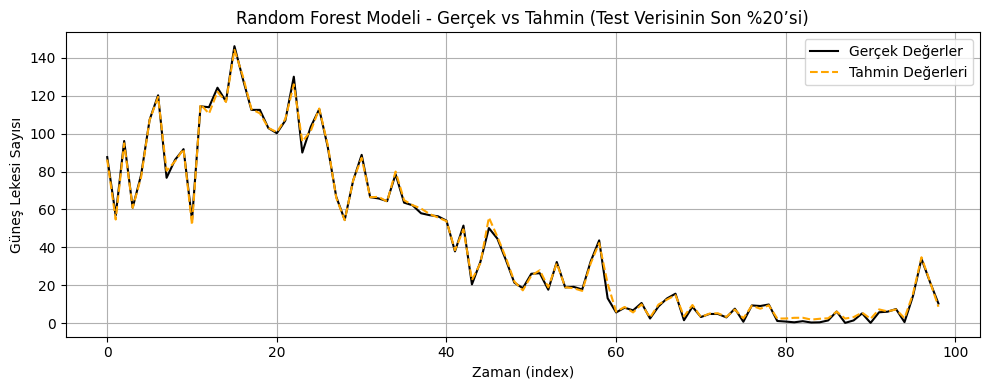

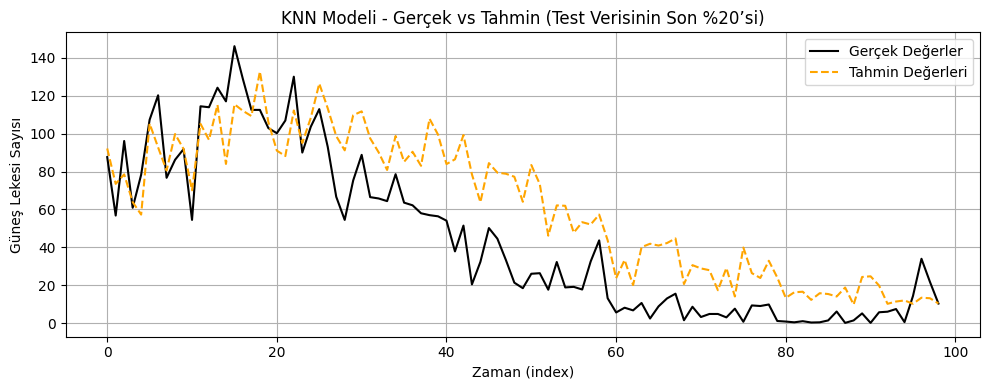

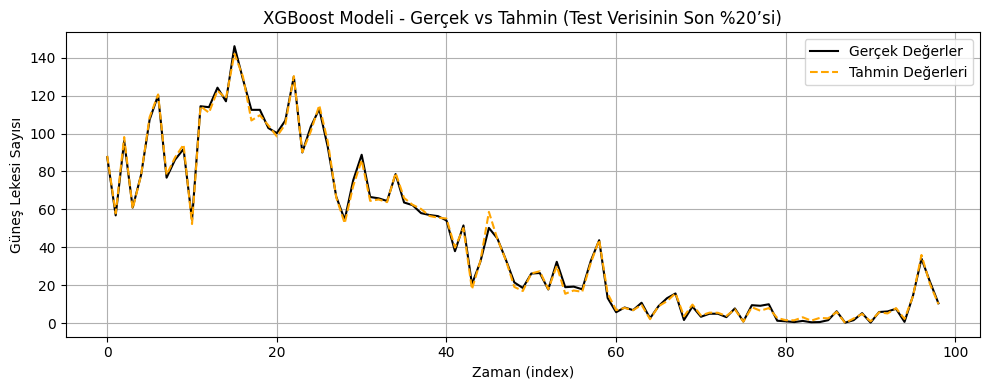

In [6]:
for name, model in models.items():
    evaluate_and_plot_model(model, name, X_train_scaled, y_train, X_test_scaled, y_test)


In [7]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_and_plot_model(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Son %20'lik kısım
    n = len(y_test)
    last_20_index = int(n * 0.2)
    y_test_last = y_test[-last_20_index:]
    y_pred_last = y_pred[-last_20_index:]

    # Performans metrikleri
    rmse = mean_squared_error(y_test_last, y_pred_last, squared=False)
    r2 = r2_score(y_test_last, y_pred_last)

    # Grafik çizimi
    plt.figure(figsize=(10, 4))
    plt.plot(y_test_last.values, label='Gerçek Değerler', color='black')
    plt.plot(y_pred_last, label='Tahmin Değerleri', linestyle='--', color='orange')
    plt.title(f"{name} (Son %20 Test)\nRMSE: {rmse:.2f} | R²: {r2:.3f}")
    plt.xlabel("Zaman (index)")
    plt.ylabel("Güneş Lekesi Sayısı")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [8]:
for name, model in models.items():
    evaluate_and_plot_model(model, name, X_train_scaled, y_train, X_test_scaled, y_test)


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 Veriyi yükle
df = pd.read_csv("Sunspots_new.csv")  # Dosya adını gerekiyorsa değiştir

# 🔹 X ve y tanımla
y = df['Monthly Mean Total Sunspot Number']
X = df.drop(columns=['Monthly Mean Total Sunspot Number'])

# 🔹 Train-test ayrımı (%80 - %20, zaman sıralı, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 🔹 Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 KNN Modeli
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn.fit(X_train_scaled, y_train)

# 🔹 Tahminler
y_pred_test = knn.predict(X_test_scaled)

# 🔹 Test verisinin son %20'si
n = len(y_test)
last_20_index = int(n * 0.2)
y_test_last = y_test[-last_20_index:]
y_pred_last = y_pred_test[-last_20_index:]

# 🔹 Performans metrikleri
# 🔹 Performans metrikleri
rmse = mean_squared_error(y_test_last, y_pred_last) ** 0.5  # squared parametresi yerine manuel karekök
r2 = r2_score(y_test_last, y_pred_last)

# 🔹 Grafik için veri oluştur
full_real = pd.concat([y_train, y_test])
full_pred = np.concatenate([
    [np.nan] * len(y_train),                      # Eğitim verisi kısmı → boş
    [np.nan] * (len(y_test) - last_20_index),     # Testin ilk %80’i → boş
    y_pred_last                                   # Testin son %20’si → tahmin
])

# 🔹 Grafik çizimi
plt.figure(figsize=(14, 5))
plt.plot(full_real.values, label="Gerçek Değerler", color="black")
plt.plot(full_pred, label=f"KNN Tahmin (Son %20)\nRMSE: {rmse:.2f}, R²: {r2:.3f}", color="orange", linestyle="--")
plt.title("KNN Modeli - Tüm Veri Üzerinde Tahmin (Sadece Testin Son %20’si)")
plt.xlabel("Zaman (index)")
plt.ylabel("Güneş Lekesi Sayısı")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 🔹 Date sütunu oluştur (eğer yoksa)
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))  # varsayılan gün: 1

# 🔹 X ve y tanımla
y = df['Monthly Mean Total Sunspot Number']
X = df.drop(columns=['Monthly Mean Total Sunspot Number', 'Date'])

# 🔹 Date serisini ayır
dates = df['Date']

# 🔹 Train-test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
dates_train, dates_test = train_test_split(dates, test_size=0.2, shuffle=False)

# 🔹 Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 KNN Modeli
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 🔹 Tahminler
y_pred_test = knn.predict(X_test_scaled)

# 🔹 Son %20 kısmı
n = len(y_test)
last_20_index = int(n * 0.2)

y_test_last = y_test[-last_20_index:]
y_pred_last = y_pred_test[-last_20_index:]
dates_last = dates_test.iloc[-last_20_index:]

# 🔹 Performans metrikleri
rmse = mean_squared_error(y_test_last, y_pred_last) ** 0.5
r2 = r2_score(y_test_last, y_pred_last)

# 🔹 Grafik
plt.figure(figsize=(14, 5))
plt.plot(dates, pd.concat([y_train, y_test]), label="Gerçek Değerler", color="black")
plt.plot(dates_last, y_pred_last, label=f"KNN Tahmin (Son %20)\nRMSE: {rmse:.2f}, R²: {r2:.3f}", color="orange", linestyle="--")
plt.title("KNN Modeli - Gerçek ve Tahmin Değerleri (Tarih Eksenli)")
plt.xlabel("Tarih")
plt.ylabel("Güneş Lekesi Sayısı")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 1. Veri yükle (zaten sen yapmıştın)
df = pd.read_csv("Sunspots.csv")
df.drop(index=df[df["Monthly Mean Total Sunspot Number"] == 0].index,inplace=True)
# 2. Özellik mühendisliği ve temizleme
df['Date'] = pd.to_datetime(df['Date'])
df['Sunspot_lag1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Sunspot_lag12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['Sunspot_lag132'] = df['Monthly Mean Total Sunspot Number'].shift(132)
df['Diff_1Year'] = df['Sunspot_lag1'] - df['Sunspot_lag12']
df['Diff_11Year'] = df['Sunspot_lag1'] - df['Sunspot_lag132']
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df = df.dropna().reset_index(drop=True)

features = [
    'Month_sin', 'Month_cos', 'Year', 'Month',
    'Sunspot_lag1', 'Sunspot_lag12', 'Sunspot_lag132',
    'Diff_11Year', 'Diff_1Year'
]

X = df[features]
y = df['Monthly Mean Total Sunspot Number']

# 3. Veriyi zaman sırasına göre train-test böl (shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 4. Özellikleri ölçeklendir (KNN mesafeye dayalı çalıştığı için önemli)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. KNN modelini oluştur ve eğit (k=5)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 6. Test verisiyle tahmin yap
y_pred = knn.predict(X_test_scaled)

# 7. Performansı değerlendir (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"KNN Regression Test RMSE: {rmse:.2f}")


KNN Regression Test RMSE: 30.26


KNN Regression Test RMSE: 30.26
KNN Regression Test R^2 Score: 0.8118
KNN Regression Test MSE: 915.6621
KNN Regression Test MAE: 22.9373


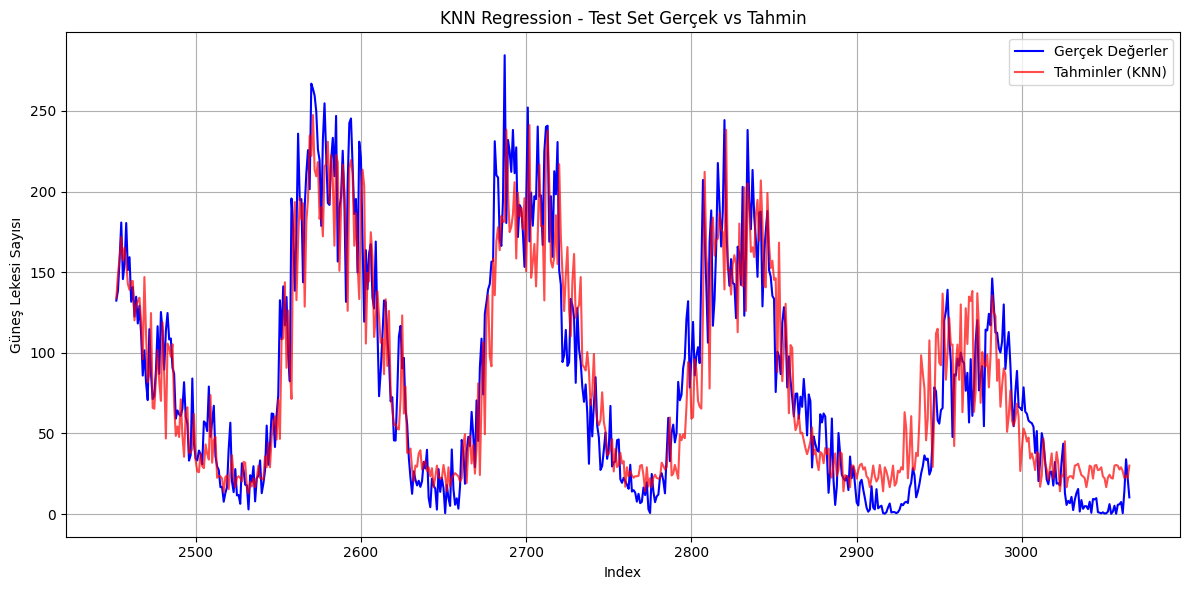

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Mevcut koddan sonra ekle:

# R^2 skoru
r2 = r2_score(y_test, y_pred)
# MSE
mse = mean_squared_error(y_test, y_pred)
# MAE
mae = mean_absolute_error(y_test, y_pred)

print(f"KNN Regression Test RMSE: {rmse:.2f}")
print(f"KNN Regression Test R^2 Score: {r2:.4f}")
print(f"KNN Regression Test MSE: {mse:.4f}")
print(f"KNN Regression Test MAE: {mae:.4f}")

# Grafik çizimi - sadece test verisi gerçek ve tahmin karşılaştırması
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Gerçek Değerler', color='blue')
plt.plot(y_test.index, y_pred, label='Tahminler (KNN)', color='red', alpha=0.7)
plt.title("KNN Regression - Test Set Gerçek vs Tahmin")
plt.xlabel("Index")
plt.ylabel("Güneş Lekesi Sayısı")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


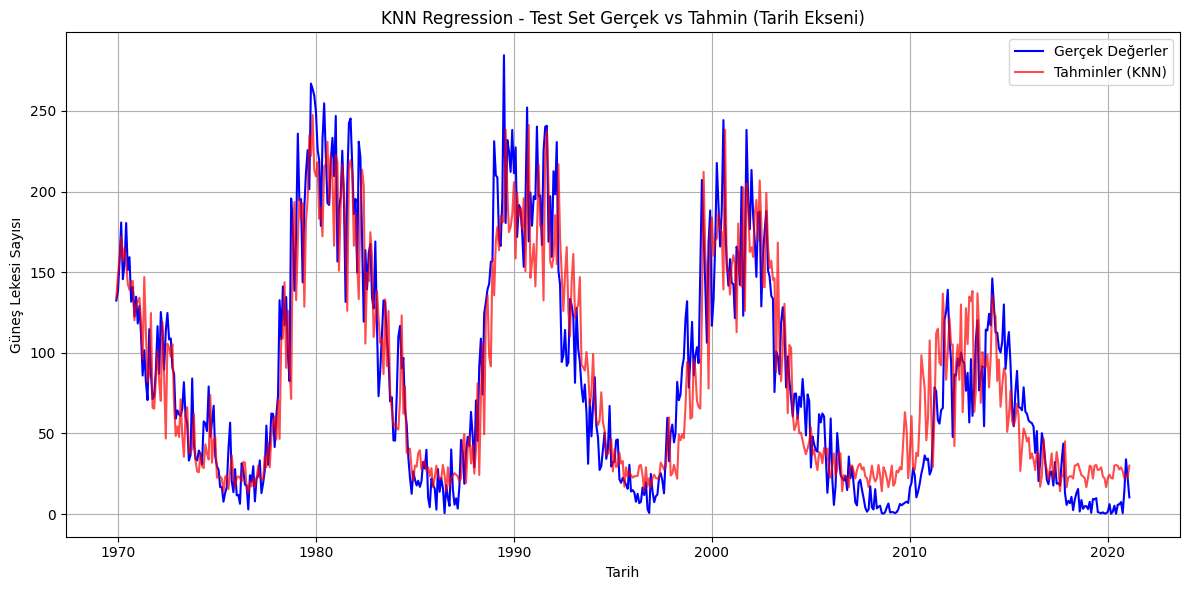

In [17]:
# 3. Veriyi zaman sırasına göre train-test böl (shuffle=False), date_test'i de alıyoruz
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(
    X, y, df['Date'], test_size=0.2, shuffle=False
)

# Diğer adımlar aynı...

# En son grafik çizimi kısmı:
plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label='Gerçek Değerler', color='blue')
plt.plot(date_test, y_pred, label='Tahminler (KNN)', color='red', alpha=0.7)
plt.title("KNN Regression - Test Set Gerçek vs Tahmin (Tarih Ekseni)")
plt.xlabel("Tarih")
plt.ylabel("Güneş Lekesi Sayısı")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KNN Regression Test RMSE: 30.26
KNN Regression Test R^2 Score: 0.8118
KNN Regression Test MSE: 915.6621
KNN Regression Test MAE: 22.9373


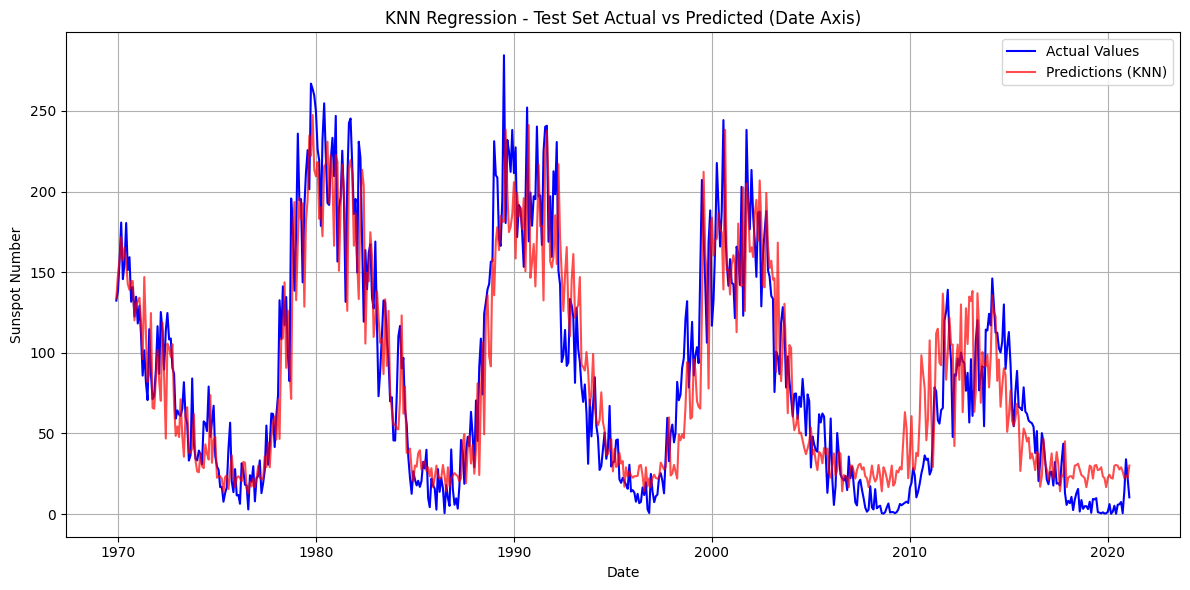

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (without shuffling), also get the test dates
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(
    X, y, df['Date'], test_size=0.2, shuffle=False
)

# Scale features (assuming scaler is already defined)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit KNN model (assuming k=5)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"KNN Regression Test RMSE: {rmse:.2f}")
print(f"KNN Regression Test R^2 Score: {r2:.4f}")
print(f"KNN Regression Test MSE: {mse:.4f}")
print(f"KNN Regression Test MAE: {mae:.4f}")

# Plot actual vs predicted with date on x-axis
plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label='Actual Values', color='blue')
plt.plot(date_test, y_pred, label='Predictions (KNN)', color='red', alpha=0.7)
plt.title("KNN Regression - Test Set Actual vs Predicted (Date Axis)")
plt.xlabel("Date")
plt.ylabel("Sunspot Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


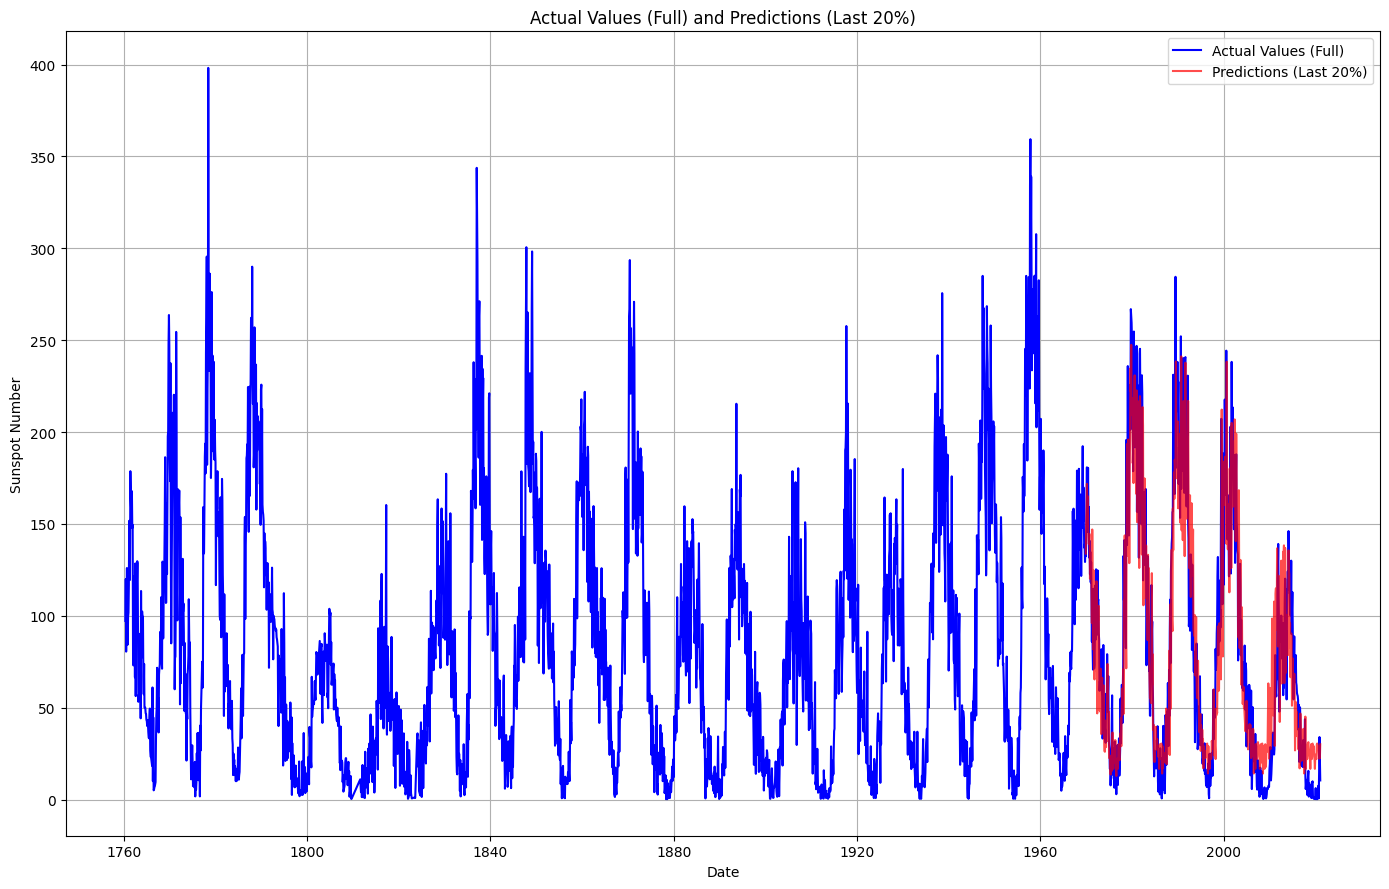

In [22]:
plt.figure(figsize=(14, 9))

# Tüm gerçek değerler (tarih ve hedef)
plt.plot(df['Date'], df['Monthly Mean Total Sunspot Number'], label='Actual Values (Full)', color='blue')

# Sadece test setinin tahminleri (date_test, y_pred)
plt.plot(date_test, y_pred, label='Predictions (Last 20%)', color='red', alpha=0.7)

plt.title("Actual Values (Full) and Predictions (Last 20%)")
plt.xlabel("Date")
plt.ylabel("Sunspot Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
